## Import modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import lightgbm as lgb

## Read data, set x_train and y_train

In [2]:
Train = pd.read_csv('hospital_train.csv')
Train

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,26082,19,3525,DX3 DX4,49,18.996774,YES,RURAL,Stable,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,0
1,3935,2,11357,dx1 dx4,32,18.807999,YES,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
2,25150,45,10831,DX6,43,26.737058,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,6843,16,3726,dx6,9,21.950668,NO,RURAL,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,1
4,30965,30,3903,DX3 DX4,44,20.591655,YES,RURAL,Stable,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22566,11752,42,7540,DX3,56,29.727765,YES,RURAL,Stable,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0
22567,32797,52,1337,Dx3 dx5,41,21.222111,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
22568,10129,44,5506,DX3,62,23.841969,YES,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
22569,5831,11,10850,DX2,33,20.058406,YES,URBAN,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1


In [3]:
X_train = Train.iloc[:,3:-1]
Y_train = Train.iloc[:, -1]

In [4]:
X_test = pd.read_csv('hospital_test_X.csv')

In [5]:
X_test = X_test.iloc[:,3:]

In [6]:
X_test

,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond
0,Dx6,35,23.775226,YES,RURAL,Stable,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
1,DX1 DX5,47,18.404252,YES,RURAL,Stable,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
2,DX3 DX5,64,27.828730,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,DX1,60,25.143488,YES,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,DX1 DX2 DX3 DX4,9,29.465496,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2503,DX3 DX5,9,29.856703,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
2504,dx1 dx2,51,21.643459,YES,URBAN,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2505,DX3 DX4,35,26.121065,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2506,DX5,23,26.064654,YES,RURAL,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Preprocessing

### Treated with drugs

In [7]:
X_train.Treated_with_drugs.unique()

array(['DX3 DX4', 'dx1 dx4', 'DX6 ', 'dx6', 'DX2', 'Dx1 dx2 ', 'dx1',
       'DX1', 'DX6', 'DX5 ', 'dx1 ', 'Dx2 ', 'Dx6', 'DX2 DX4', 'Dx4',
       'DX3 DX5', 'DX1 DX3', 'DX3', 'dx6 ', 'DX5', 'DX2 ', 'Dx2 dx3',
       'DX4', 'DX1 DX4', 'dx1 dx3 ', 'DX1 DX2', 'DX3 DX4 ', 'Dx2 dx5',
       'DX2 DX5', 'DX4 DX5', 'Dx6 ', 'DX1 DX2 DX3', 'dx3 dx5', 'DX1 ',
       'DX3 ', 'DX1 DX2 DX5', 'DX1 DX4 ', 'Dx1 dx3', 'Dx2', 'dx2 dx5',
       'DX1 DX3 ', 'Dx3 ', 'dx1 dx3', 'Dx3', 'DX4 ', 'DX2 DX4 DX5', 'dx2',
       'DX2 DX3 DX4 ', 'DX1 DX3 DX5 ', 'dx5', 'DX3 DX4 DX5', 'dx4 ',
       'DX1 DX2 DX3 DX5', 'dx4', 'dx2 ', 'dx3', 'Dx5', 'Dx1', 'dx2 dx3',
       'dx4 dx5', 'DX2 DX3', 'Dx1 dx5 ', 'Dx4 ', 'DX1 DX5 ', 'DX2 DX4 ',
       'Dx2 dx4 ', 'dx5 ', 'DX3 DX4 DX5 ', 'DX1 DX2 DX4 ', 'DX2 DX3 ',
       'dx3 dx4', 'DX1 DX2 ', 'Dx3 dx5 ', 'dx2 dx3 ', 'DX2 DX3 DX4',
       'dx1 dx3 dx5', 'DX2 DX5 ', 'dx3 ', 'DX2 DX4 DX5 ', 'DX1 DX5',
       'Dx1 dx2 dx5 ', 'DX4 DX5 ', 'DX1 DX3 DX4 ', 'Dx3 dx4', 'dx2 dx4',
     

In [8]:
def clean(X):
    X['Treated_with_drugs'] = X['Treated_with_drugs'].str.upper()
    X = X.join(X['Treated_with_drugs'].str.join(sep='').str.get_dummies(sep=' '))
    X.drop(columns='Treated_with_drugs', inplace = True)
    
    for i in X.loc[:,'DX1':'DX6']:
        new_name = 'Drug_{}'.format(i)
        X = X.rename({i:new_name},axis=1)
    return X

In [9]:
X_train = clean(X_train)
X_test = clean(X_test)

### Patient_Smoker

In [10]:
X_train.Patient_Smoker.unique()

array(['YES', 'NO ', 'NO', 'YES ', 'YESS', 'YESS ', 'CANNOT SAY',
       'Cannot say', 'CANNOT SAY ', 'Cannot say '], dtype=object)

In [11]:
X_test.Patient_Smoker.unique()

array(['YES ', 'NO', 'YES', 'NO ', 'YESS', 'YESS '], dtype=object)

In [12]:
def Dummies(X):
    X['Patient_Smoker'] = X['Patient_Smoker'].str.strip()
    X['Patient_Smoker'] = X['Patient_Smoker'].str.lower()
    X['Patient_Smoker'] = X['Patient_Smoker'].str.replace('yess', 'yes')
    X['Patient_Smoker'] = X['Patient_Smoker'].str.replace('cannotsay', 'cannot say')
    
    X = X.join(pd.get_dummies(X['Patient_Smoker'], prefix='Smoker'))
    X.drop(columns='Patient_Smoker', inplace=True)
    return X

In [13]:
X_test['Smoker_cannot say'] = 0

In [14]:
X_train = Dummies(X_train)
X_test = Dummies(X_test)

### Patient_Rural_Urban

In [15]:
X_train.Patient_Rural_Urban.unique()

array(['RURAL', 'URBAN'], dtype=object)

In [16]:
def Categorical(X):
    X['Patient_Rural_Urban'] = pd.Categorical(X['Patient_Rural_Urban']).codes
    return X

In [17]:
X_train = Categorical(X_train)
X_test = Categorical(X_test)

### Patient_mental_condition

In [18]:
X_train.Patient_mental_condition.unique()

array(['Stable'], dtype=object)

In [19]:
def drop_col(X):
    X.drop(columns='Patient_mental_condition', inplace=True)
    return X

In [20]:
X_train = drop_col(X_train)
X_test = drop_col(X_test)

### A-Z

In [21]:
X_train.A.unique()

array([ 0.,  1., nan])

In [22]:
def Nan_A_Z(X):
    X['Nan']=0
    ind = np.where(X.A.isna() == True)[0]
    if len(np.where(X.loc[ind, 'A':'Z'].isna() == False)[0]) == 0:
        X.loc[ind, 'Nan'] = 1
        
    X = X[['Patient_Age', 'Patient_Body_Mass_Index', 'Patient_Rural_Urban', 'A',
       'B', 'C', 'D', 'E', 'F', 'Z','Nan', 'Number_of_prev_cond', 'Drug_DX1',
       'Drug_DX2', 'Drug_DX3', 'Drug_DX4', 'Drug_DX5', 'Drug_DX6',
       'Smoker_cannot say', 'Smoker_no', 'Smoker_yes']]
    X = X.fillna(0)
    return X

In [23]:
X_train = Nan_A_Z(X_train)
X_test = Nan_A_Z(X_test)

In [24]:
X_train.isna().sum()

Patient_Age                0
Patient_Body_Mass_Index    0
Patient_Rural_Urban        0
A                          0
B                          0
C                          0
D                          0
E                          0
F                          0
Z                          0
Nan                        0
Number_of_prev_cond        0
Drug_DX1                   0
Drug_DX2                   0
Drug_DX3                   0
Drug_DX4                   0
Drug_DX5                   0
Drug_DX6                   0
Smoker_cannot say          0
Smoker_no                  0
Smoker_yes                 0
dtype: int64

In [25]:
X_train

,Patient_Age,Patient_Body_Mass_Index,Patient_Rural_Urban,A,B,C,D,E,F,Z,...,Number_of_prev_cond,Drug_DX1,Drug_DX2,Drug_DX3,Drug_DX4,Drug_DX5,Drug_DX6,Smoker_cannot say,Smoker_no,Smoker_yes
0,49,18.996774,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,2.0,0,0,1,1,0,0,0,0,1
1,32,18.807999,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,2.0,1,0,0,1,0,0,0,0,1
2,43,26.737058,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0,0,0,0,0,1,0,1,0
3,9,21.950668,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,3.0,0,0,0,0,0,1,0,1,0
4,44,20.591655,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,2.0,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22566,56,29.727765,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,2.0,0,0,1,0,0,0,0,0,1
22567,41,21.222111,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0,0,1,0,1,0,0,1,0
22568,62,23.841969,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0,0,1,0,0,0,0,0,1
22569,33,20.058406,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0,1,0,0,0,0,0,0,1


In [26]:
X_test

,Patient_Age,Patient_Body_Mass_Index,Patient_Rural_Urban,A,B,C,D,E,F,Z,...,Number_of_prev_cond,Drug_DX1,Drug_DX2,Drug_DX3,Drug_DX4,Drug_DX5,Drug_DX6,Smoker_cannot say,Smoker_no,Smoker_yes
0,35,23.775226,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,2.0,0,0,0,0,0,1,0,0,1
1,47,18.404252,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,2.0,1,0,0,0,1,0,0,0,1
2,64,27.828730,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0,0,1,0,1,0,0,1,0
3,60,25.143488,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1,0,0,0,0,0,0,0,1
4,9,29.465496,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1,1,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2503,9,29.856703,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,2.0,0,0,1,0,1,0,0,1,0
2504,51,21.643459,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1,1,0,0,0,0,0,0,1
2505,35,26.121065,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0,0,1,1,0,0,0,0,1
2506,23,26.064654,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,1,0,0,0,1


## SVM classification

In [27]:
svm_classifier = SVC()
svm_classifier.fit(X_train, Y_train)
print('Accuracy score for train data:', accuracy_score(svm_classifier.predict(X_train), Y_train))

Accuracy score for train data: 0.7570333613929379


In [28]:
Y_pred_svm = svm_classifier.predict(X_test)
Y_pred_svm

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [29]:
# param_grid = {'C': list(np.linspace(1, 1000, 5)),
#                'gamma': [0.00003, 0.1, 0.01, 1],
#                'kernel': ['rbf']}
# grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
# grid.fit(X_train, Y_train)

In [30]:
# Y_pred_svm2 = grid.best_estimator_.predict(X_test)

## Decision Tree Classification

In [31]:
dtc = DecisionTreeClassifier(max_leaf_nodes=5)
dtc.fit(X_train, Y_train)
print('Accuracy score for train data:', accuracy_score(dtc.predict(X_train), Y_train))

Accuracy score for train data: 0.7188427628372691


In [32]:
Y_pred_dtc = dtc.predict(X_test)
Y_pred_dtc

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

[]

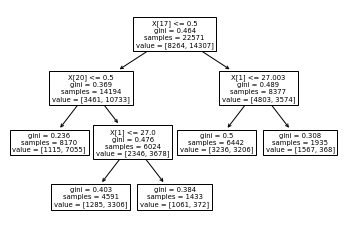

In [33]:
from sklearn.tree import plot_tree
plot_tree(dtc)
plt.plot()

In [34]:
bc = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)
bc.fit(X_train, Y_train)
print('Accuracy score for train data:', accuracy_score(bc.predict(X_train), Y_train))

Accuracy score for train data: 0.966284169952594


In [35]:
Y_pred_bc = bc.predict(X_test)
Y_pred_bc

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

## Random Forest Classification

In [36]:
rf = RandomForestClassifier(max_leaf_nodes=8
                            , n_estimators=50)
rf.fit(X_train, Y_train)
print('Accuracy score for train data:', accuracy_score(rf.predict(X_train), Y_train))

Accuracy score for train data: 0.7499446192016304


In [37]:
Y_pred_rf = rf.predict(X_test)
Y_pred_rf

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

## Boosting

In [38]:
adac = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_leaf_nodes=6, max_depth=2), n_estimators=100)
adac.fit(X_train, Y_train)
print('Accuracy score for train data:', accuracy_score(adac.predict(X_train), Y_train))

Accuracy score for train data: 0.8144964777812237


In [39]:
Y_pred_adac = adac.predict(X_test)
Y_pred_adac

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

## LGBM Classification

In [40]:
clf = lgb.LGBMClassifier(n_estimators=1000, learning_rate=0.1)
clf.fit(X_train, Y_train)
print("Accuracy score for train data: ", accuracy_score(clf.predict(X_train), Y_train))

Accuracy score for train data:  0.9165743653360506


In [41]:
Y_pred_lgb = clf.predict(X_test)
Y_pred_lgb

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [45]:
result = pd.DataFrame(data={'Survived_1_year': Y_pred_lgb}, columns = ['Survived_1_year'])

---

In [48]:
Y_test = pd.read_csv('y_test.csv')

print("Accuracy score for test data, SVM: ", accuracy_score(Y_pred_svm, Y_test))
print("Accuracy score for test data, Decision Tree: ", accuracy_score(Y_pred_dtc, Y_test))
print("Accuracy score for test data, Random Forest: ", accuracy_score(Y_pred_rf, Y_test))
print("Accuracy score for test data, Bagging: ", accuracy_score(Y_pred_bc, Y_test))
print("Accuracy score for test data: Boosting", accuracy_score(Y_pred_adac, Y_test))
print("Accuracy score for test data: LGBM", accuracy_score(Y_pred_lgb, Y_test))

Accuracy score for test data, SVM:  0.7575757575757576
Accuracy score for test data, Decision Tree:  0.7129186602870813
Accuracy score for test data, Random Forest:  0.7496012759170654
Accuracy score for test data, Bagging:  0.7811004784688995
Accuracy score for test data: Boosting 0.7830940988835726
Accuracy score for test data: LGBM 0.7882775119617225


In [50]:
result.to_csv('predictions.csv', index=False)